In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
INPUT_FILE = 'curl_http3_results.csv'

In [77]:
df_input = pd.read_csv(INPUT_FILE)
df_input

,url,time_appconnect,time_connect,time_namelookup,time_pretransfer,time_redirect,time_starttransfer,time_total,remote_ip,remote_port
0,https://www.google.com,0.025157,0.0,0.001089,0.029132,0.0,0.174951,0.178593,172.217.16.196,443
1,https://www.facebook.com,0.013462,0.0,0.000959,0.014599,0.0,0.144340,0.144399,157.240.251.35,443
2,https://www.youtube.com,0.042819,0.0,0.010791,0.045107,0.0,0.113004,0.211162,142.250.185.78,443
3,https://www.googleapis.com,0.020777,0.0,0.001414,0.022276,0.0,0.126458,0.126549,142.250.185.106,443
4,https://www.instagram.com,0.017906,0.0,0.001750,0.019409,0.0,0.170712,0.363936,157.240.253.174,443
...,...,...,...,...,...,...,...,...,...,...
2408,https://www.metruyencv.info,0.037535,0.0,0.012259,0.039620,0.0,0.104584,0.104687,172.67.183.189,443
2409,https://www.qadc.top,0.267545,0.0,0.103998,0.269566,0.0,1.012217,1.012348,172.67.167.163,443
2410,https://www.xn--l3cb1ea6bib.com,0.044944,0.0,0.028039,0.045988,0.0,0.074477,0.074539,188.114.96.3,443
2411,https://www.nu.or.id,0.872341,0.0,0.854189,0.874306,0.0,1.784912,1.856943,188.114.96.3,443


In [78]:
df_input['duration_redirection'] = df_input['time_redirect']
df_input['duration_dns_lookup'] = df_input['time_namelookup'] - df_input['time_redirect']
df_input['duration_tcp_connection'] = 0
df_input['duration_ssl_handshake'] = df_input['time_appconnect'] - df_input['time_connect']
df_input['duration_pre_transfer'] = df_input['time_pretransfer'] - df_input['time_appconnect']
df_input['duration_ttfb'] = df_input['time_starttransfer'] - df_input['time_pretransfer']
df_input['duration_data_transfer'] = df_input['time_total'] - df_input['time_starttransfer']

duration_columns = [
    'duration_redirection',
    'duration_dns_lookup',
    'duration_tcp_connection',
    'duration_ssl_handshake',
    'duration_pre_transfer',
    'duration_ttfb',
    'duration_data_transfer'
]

durations = df_input[duration_columns]
durations_melted = durations.melt(var_name='Event', value_name='Duration')
durations_melted['Protocol'] = 'HTTP/3'
durations

,duration_redirection,duration_dns_lookup,duration_tcp_connection,duration_ssl_handshake,duration_pre_transfer,duration_ttfb,duration_data_transfer
0,0.0,0.001089,0,0.025157,0.003975,0.145819,0.003642
1,0.0,0.000959,0,0.013462,0.001137,0.129741,0.000059
2,0.0,0.010791,0,0.042819,0.002288,0.067897,0.098158
3,0.0,0.001414,0,0.020777,0.001499,0.104182,0.000091
4,0.0,0.001750,0,0.017906,0.001503,0.151303,0.193224
...,...,...,...,...,...,...,...
2408,0.0,0.012259,0,0.037535,0.002085,0.064964,0.000103
2409,0.0,0.103998,0,0.267545,0.002021,0.742651,0.000131
2410,0.0,0.028039,0,0.044944,0.001044,0.028489,0.000062
2411,0.0,0.854189,0,0.872341,0.001965,0.910606,0.072031


In [79]:
df_input['start_redirection'] = 0
df_input['start_dns_lookup'] = df_input['time_redirect']
df_input['start_tcp_connection'] = df_input['time_namelookup']
df_input['start_ssl_handshake'] = df_input['time_namelookup']
df_input['start_pre_transfer'] = df_input['time_appconnect']
df_input['start_ttfb'] = df_input['time_pretransfer']
df_input['start_data_transfer'] = df_input['time_starttransfer']

# Prepare data for plotting
start_time_columns = [
    'start_redirection',
    'start_dns_lookup',
    'start_tcp_connection',
    'start_ssl_handshake',
    'start_pre_transfer',
    'start_ttfb',
    'start_data_transfer'
]

start_times= df_input[start_time_columns]
start_times_melted = start_times.melt(var_name='Event', value_name='Start Time')
start_times

,start_redirection,start_dns_lookup,start_tcp_connection,start_ssl_handshake,start_pre_transfer,start_ttfb,start_data_transfer
0,0,0.0,0.001089,0.001089,0.025157,0.029132,0.174951
1,0,0.0,0.000959,0.000959,0.013462,0.014599,0.144340
2,0,0.0,0.010791,0.010791,0.042819,0.045107,0.113004
3,0,0.0,0.001414,0.001414,0.020777,0.022276,0.126458
4,0,0.0,0.001750,0.001750,0.017906,0.019409,0.170712
...,...,...,...,...,...,...,...
2408,0,0.0,0.012259,0.012259,0.037535,0.039620,0.104584
2409,0,0.0,0.103998,0.103998,0.267545,0.269566,1.012217
2410,0,0.0,0.028039,0.028039,0.044944,0.045988,0.074477
2411,0,0.0,0.854189,0.854189,0.872341,0.874306,1.784912


In [80]:
df_input['end_redirection'] = df_input['time_redirect']
df_input['end_dns_lookup'] = df_input['time_namelookup']
df_input['end_tcp_connection'] = df_input['start_tcp_connection']
df_input['end_ssl_handshake'] = df_input['time_appconnect']
df_input['end_pre_transfer'] = df_input['time_pretransfer']
df_input['end_ttfb'] = df_input['time_starttransfer']
df_input['end_data_transfer'] = df_input['time_total']

end_time_columns = [
    'end_redirection',
    'end_dns_lookup',
    'end_tcp_connection',
    'end_ssl_handshake',
    'end_pre_transfer',
    'end_ttfb',
    'end_data_transfer'
]

end_times = df_input[end_time_columns]
end_times_melted = end_times.melt(var_name='Event', value_name='End Time')
end_times

,end_redirection,end_dns_lookup,end_tcp_connection,end_ssl_handshake,end_pre_transfer,end_ttfb,end_data_transfer
0,0.0,0.001089,0.001089,0.025157,0.029132,0.174951,0.178593
1,0.0,0.000959,0.000959,0.013462,0.014599,0.144340,0.144399
2,0.0,0.010791,0.010791,0.042819,0.045107,0.113004,0.211162
3,0.0,0.001414,0.001414,0.020777,0.022276,0.126458,0.126549
4,0.0,0.001750,0.001750,0.017906,0.019409,0.170712,0.363936
...,...,...,...,...,...,...,...
2408,0.0,0.012259,0.012259,0.037535,0.039620,0.104584,0.104687
2409,0.0,0.103998,0.103998,0.267545,0.269566,1.012217,1.012348
2410,0.0,0.028039,0.028039,0.044944,0.045988,0.074477,0.074539
2411,0.0,0.854189,0.854189,0.872341,0.874306,1.784912,1.856943


/var/folders/8q/rwl87l651pv07ptk0mdv930h0000gn/T/ipykernel_2473/2033383792.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
/var/folders/8q/rwl87l651pv07ptk0mdv930h0000gn/T/ipykernel_2473/2033383792.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
/var/folders/8q/rwl87l651pv07ptk0mdv930h0000gn/T/ipykernel_2473/2033383792.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')


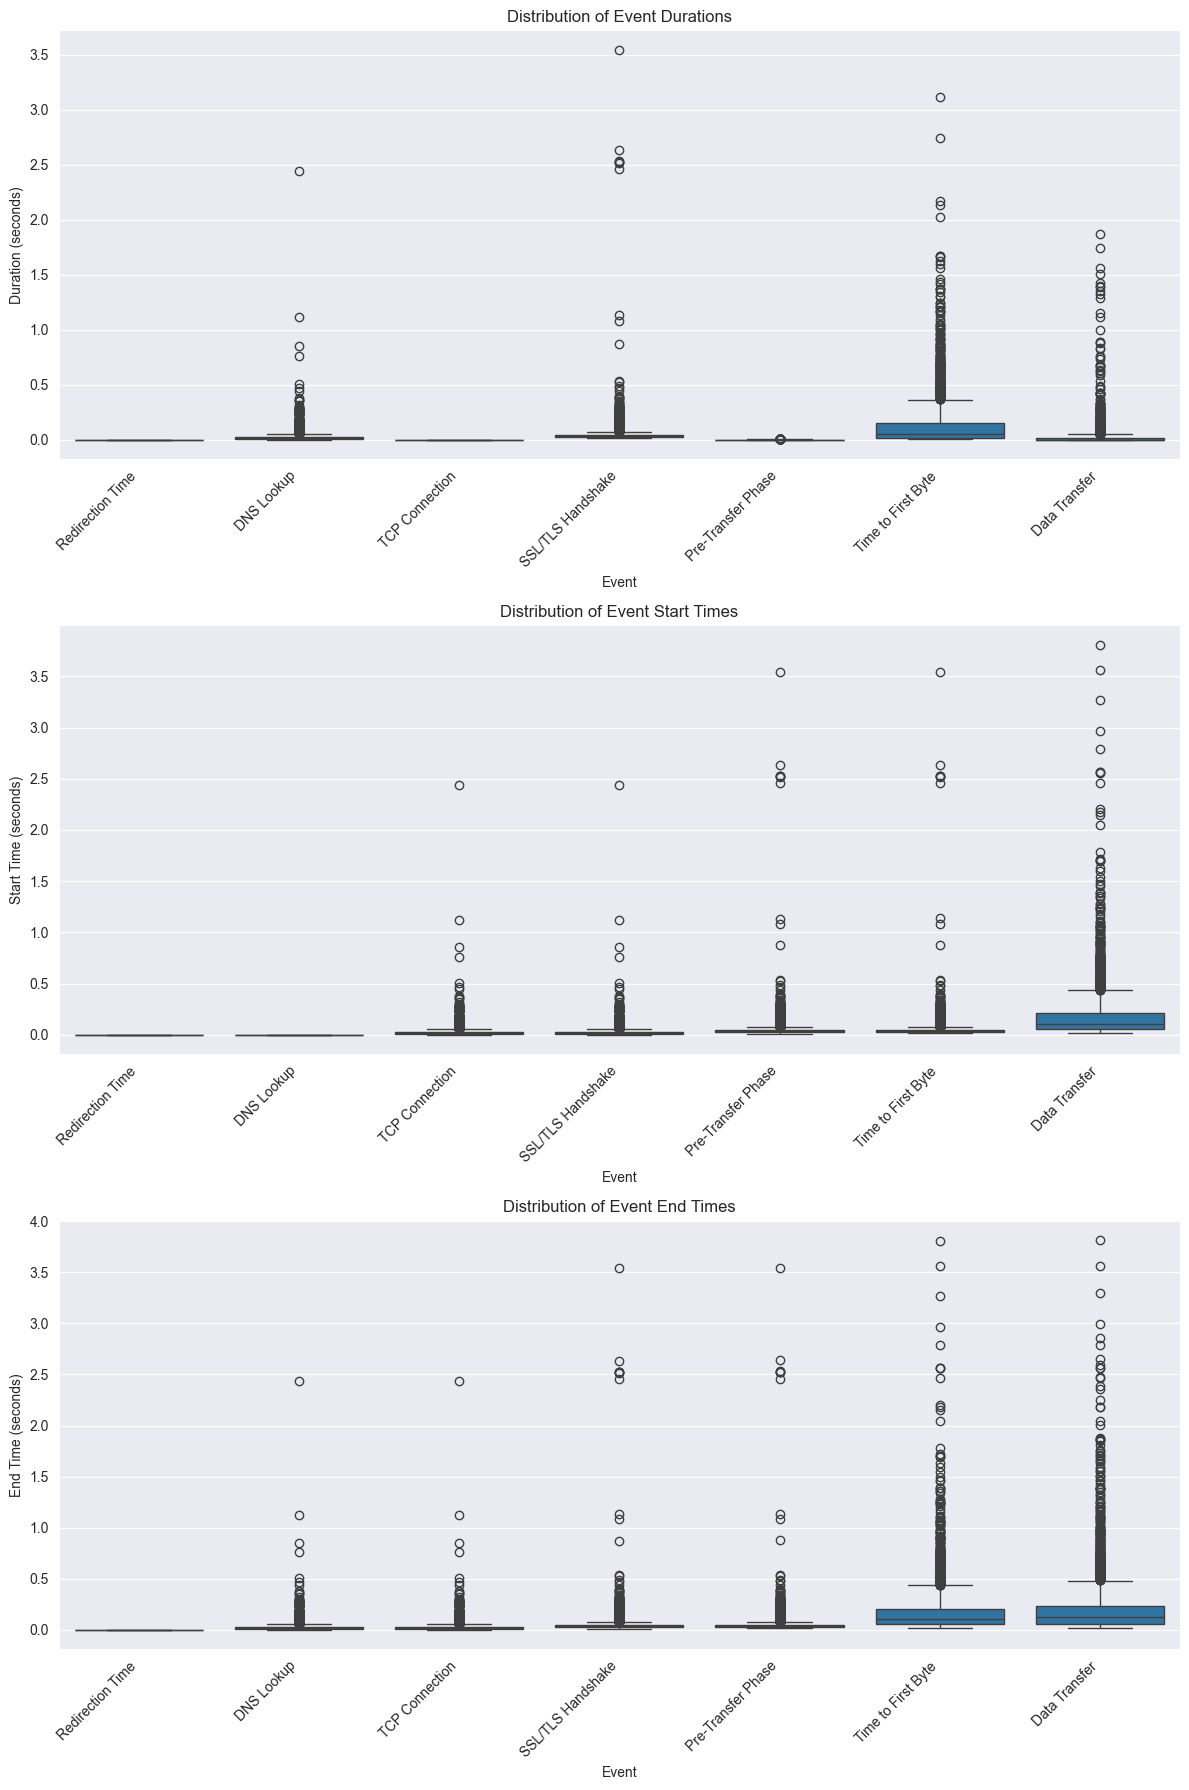

In [81]:
event_labels = {
    'duration_redirection': 'Redirection Time',
    'duration_dns_lookup': 'DNS Lookup',
    'duration_tcp_connection': 'TCP Connection',
    'duration_ssl_handshake': 'SSL/TLS Handshake',
    'duration_pre_transfer': 'Pre-Transfer Phase',
    'duration_ttfb': 'Time to First Byte',
    'duration_data_transfer': 'Data Transfer',
    'start_redirection': 'Redirection Time',
    'start_dns_lookup': 'DNS Lookup',
    'start_tcp_connection': 'TCP Connection',
    'start_ssl_handshake': 'SSL/TLS Handshake',
    'start_pre_transfer': 'Pre-Transfer Phase',
    'start_ttfb': 'Time to First Byte',
    'start_data_transfer': 'Data Transfer',
    'end_redirection': 'Redirection Time',
    'end_dns_lookup': 'DNS Lookup',
    'end_tcp_connection': 'TCP Connection',
    'end_ssl_handshake': 'SSL/TLS Handshake',
    'end_pre_transfer': 'Pre-Transfer Phase',
    'end_ttfb': 'Time to First Byte',
    'end_data_transfer': 'Data Transfer'
}

durations_melted['Event'] = durations_melted['Event'].map(event_labels)
start_times_melted['Event'] = start_times_melted['Event'].map(event_labels)
end_times_melted['Event'] = end_times_melted['Event'].map(event_labels)

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot durations
sns.boxplot(ax=axes[0], x='Event', y='Duration', data=durations_melted)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_xlabel('Event')
axes[0].set_ylabel('Duration (seconds)')
axes[0].set_title('Distribution of Event Durations')

# Plot start times
sns.boxplot(ax=axes[1], x='Event', y='Start Time', data=start_times_melted)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_xlabel('Event')
axes[1].set_ylabel('Start Time (seconds)')
axes[1].set_title('Distribution of Event Start Times')

# Plot end times
sns.boxplot(ax=axes[2], x='Event', y='End Time', data=end_times_melted)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')
axes[2].set_xlabel('Event')
axes[2].set_ylabel('End Time (seconds)')
axes[2].set_title('Distribution of Event End Times')

plt.tight_layout()
plt.show()